# In this notebook we will do exploratory data analysis on our dataset

### Import essential libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


### Import CSV dataset

In [2]:
jobData = pd.read_csv('jobCleanedData.csv')
jobData.head()

,Unnamed: 0,title,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,description_length,company_profile_length,requirements_length,benefits_length
0,0,Marketing Intern,US,0,1,0,Other,Internship,NaN,NaN,Marketing,0,905.0,885.0,852.0,NaN
1,1,Customer Service - Cloud Video Production,NZ,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,2086.0,1292.0,1447.0,1298.0
2,2,Commissioning Machinery Assistant (CMA),US,0,1,0,NaN,NaN,NaN,NaN,NaN,0,355.0,893.0,1369.0,NaN
3,3,Account Executive - Washington DC,US,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,2613.0,618.0,1435.0,786.0
4,4,Bill Review Manager,US,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1598.0,1632.0,759.0,21.0


## Exploration of dataset

### Finding out the dimensions of the dataset

In [3]:
print("Data type : ", type(jobData))
print("Data dims : ", jobData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (17880, 16)


### To get more info about the variables in the dataset

In [4]:
jobData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              17880 non-null  int64  
 1   title                   17880 non-null  object 
 2   location                17534 non-null  object 
 3   telecommuting           17880 non-null  int64  
 4   has_company_logo        17880 non-null  int64  
 5   has_questions           17880 non-null  int64  
 6   employment_type         14409 non-null  object 
 7   required_experience     10830 non-null  object 
 8   required_education      9775 non-null   object 
 9   industry                12977 non-null  object 
 10  function                11425 non-null  object 
 11  fraudulent              17880 non-null  int64  
 12  description_length      17875 non-null  float64
 13  company_profile_length  14572 non-null  float64
 14  requirements_length     15185 non-null

### Plot a seaborn bargraph to show the number of fraudulent and non-fraudulent jobs

Number of real (label as 0) and fake jobs (label as 1) in the dataset :
0    17014
1      866
Name: fraudulent, dtype: int64


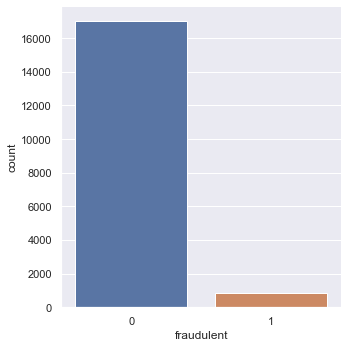

In [5]:
# num of fake jobs in the Dataset
print("Number of real (label as 0) and fake jobs (label as 1) in the dataset :")


print(jobData["fraudulent"].value_counts())
sb.catplot(x="fraudulent", data = jobData, kind = "count")

Since the number of non-fraudulent jobs is much higher than the fraudulent ones, we can see that the dataset is very imbalanced.

# Exploratory Data Analysis of Variables

## Title

In [6]:
title = pd.DataFrame(jobData[['title','fraudulent']])
title = title[title.fraudulent.eq(1)]
print(title["title"].value_counts())

Data Entry Admin/Clerical Positions - Work From Home               21
Home Based Payroll Typist/Data Entry Clerks Positions Available    21
Cruise Staff Wanted *URGENT*                                       21
Customer Service Representative                                    17
Administrative Assistant                                           16
                                                                   ..
RN, SURGERY UNIT DIRECTOR                                           1
Registered Nurse                                                    1
Licensed Practical Nurse                                            1
Professional Development Coordinator (Perioperative)                1
Furniture mover                                                     1
Name: title, Length: 560, dtype: int64


### We can see that job postings about Data Entry Admin and Clerk positions that allow WFH have the highest chance of being fraudulent.

## Location

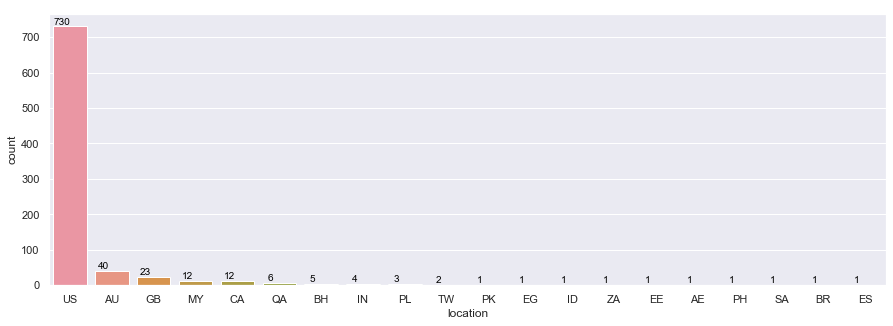

In [7]:
locationfraudulent = pd.DataFrame(jobData[['location','fraudulent']])
locationfraudulent = locationfraudulent[locationfraudulent.fraudulent.eq(1)]
plt.figure(figsize=(15,5))
ax=sb.countplot(x ="location", data=locationfraudulent, order=locationfraudulent['location'].value_counts().index)
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=10)

### We can see that most of the fraudulent job postings comes from the US(United States), followed by AU(Australia) and so on.

## Telecommuting

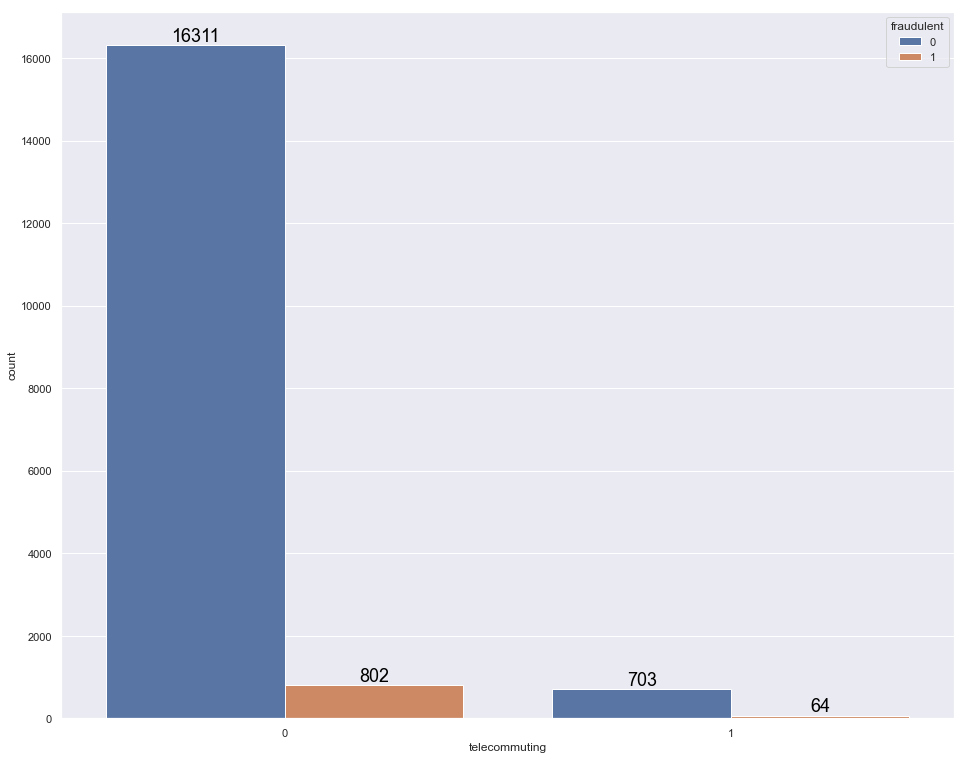

In [8]:
plt.figure(figsize=(16,13))
ax=sb.countplot(x ="telecommuting", hue="fraudulent", data=jobData)
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=18)

### Job postings with telecommuting are more likely to be fraudulent.

## Has company logo

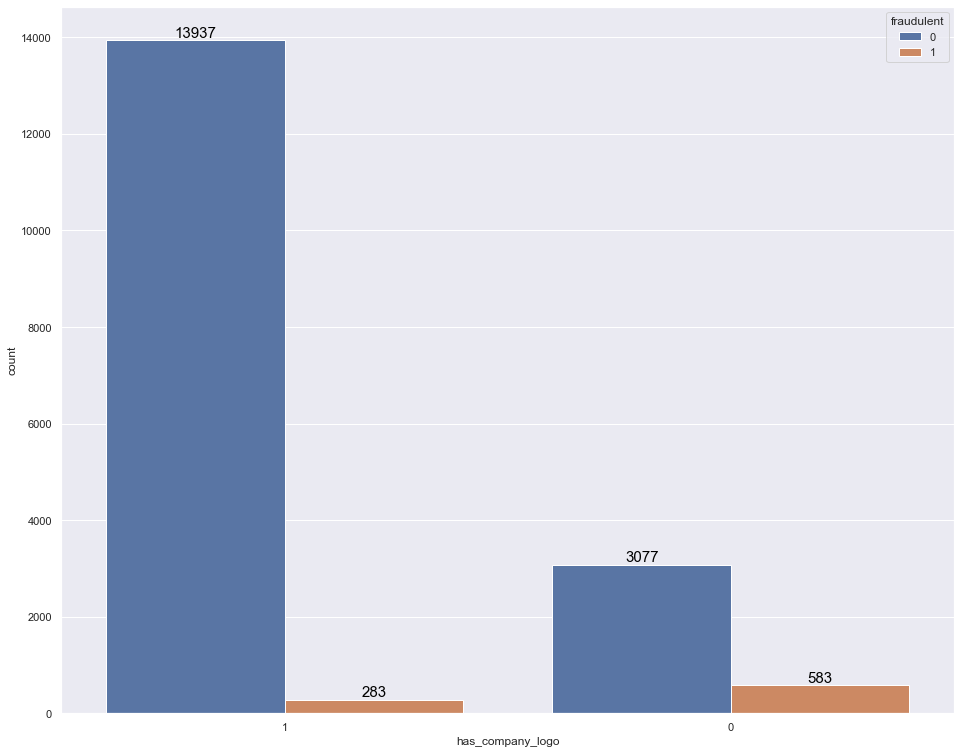

In [9]:
plt.figure(figsize=(16,13))
ax=sb.countplot(x ="has_company_logo", hue="fraudulent", data=jobData, order=jobData['has_company_logo'].value_counts().index)
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=15)

### Job postings without the company logo are more likely to be fraudulent.

## Has questions

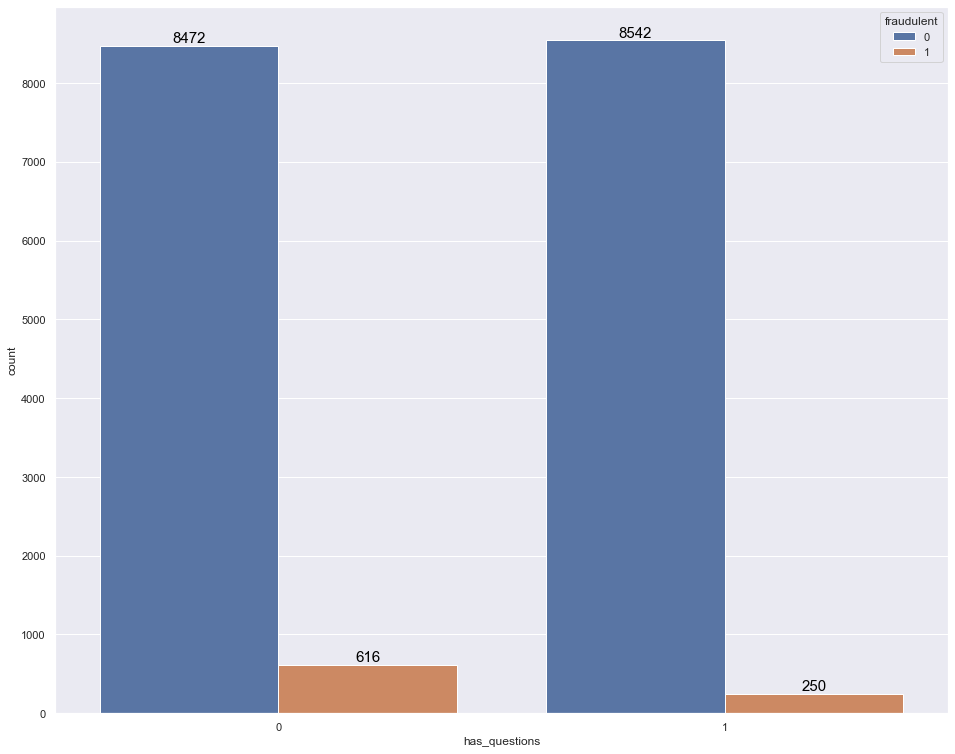

In [10]:
plt.figure(figsize=(16,13))
ax=sb.countplot(x ="has_questions", hue="fraudulent", data=jobData)
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=15)

### Job postings without questions are more likely to be fraudulent

## Employment type

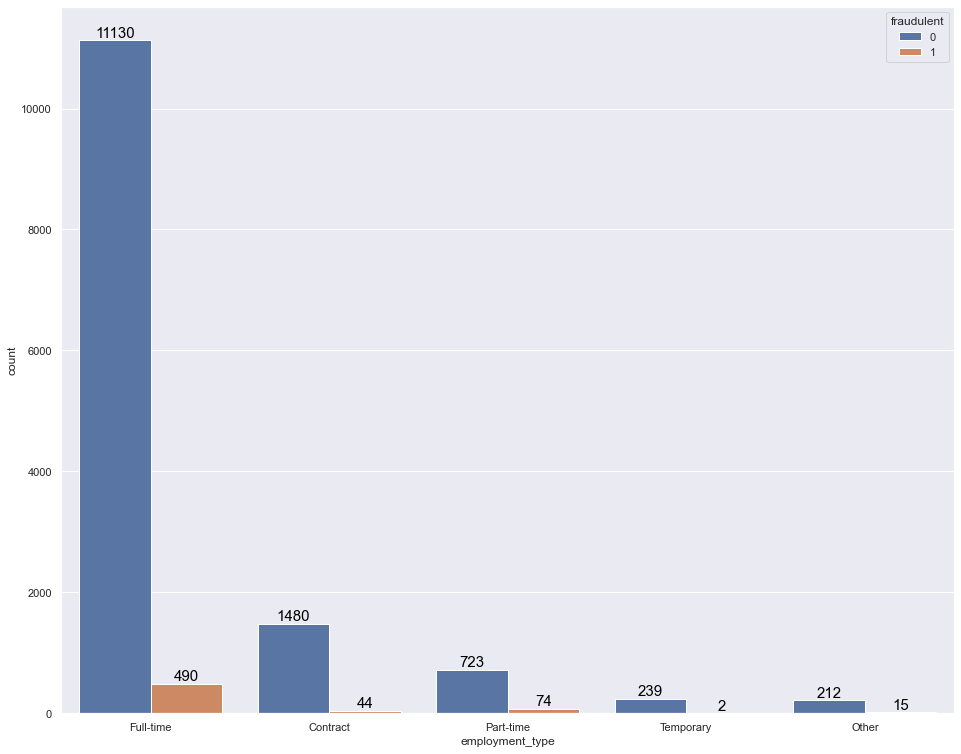

In [11]:
plt.figure(figsize=(16,13))
ax=sb.countplot(x ="employment_type",hue="fraudulent", data= jobData, order=jobData['employment_type'].value_counts().index)
for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=15)

### Part time job postings have the highest chance of being fraudulent

## Required Experience

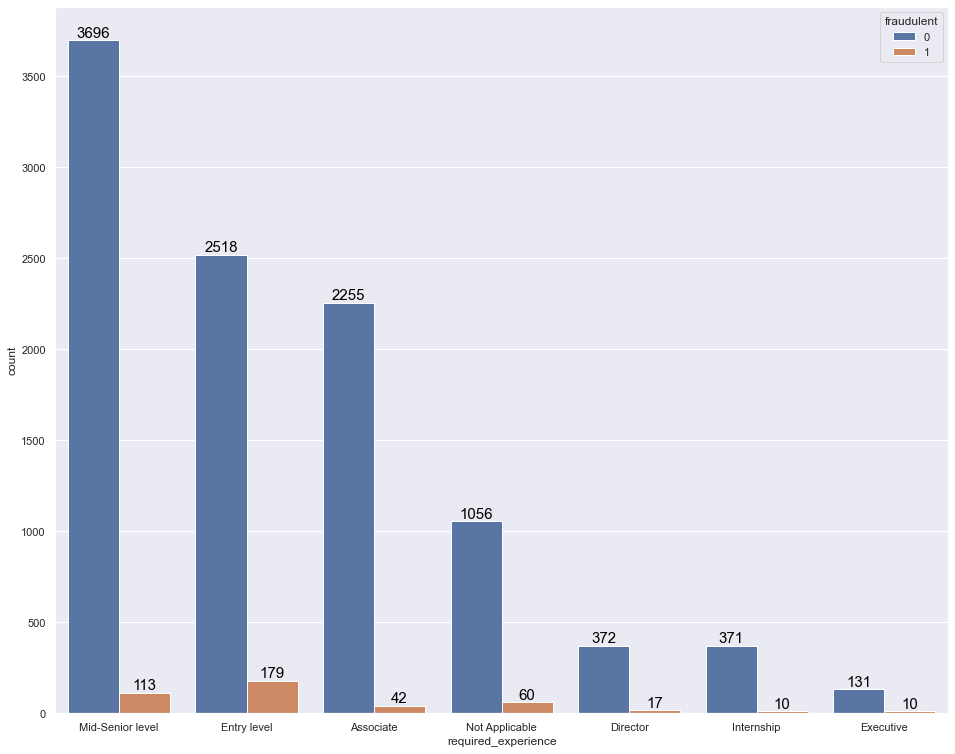

In [12]:
plt.figure(figsize=(16,13))
ax=sb.countplot(x ="required_experience",hue="fraudulent", data= jobData, order=jobData['required_experience'].value_counts().index)
for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=15)

### Most of the fake job postings are under the elements NULL, Mid-senior level and Entry level.

## Required Education

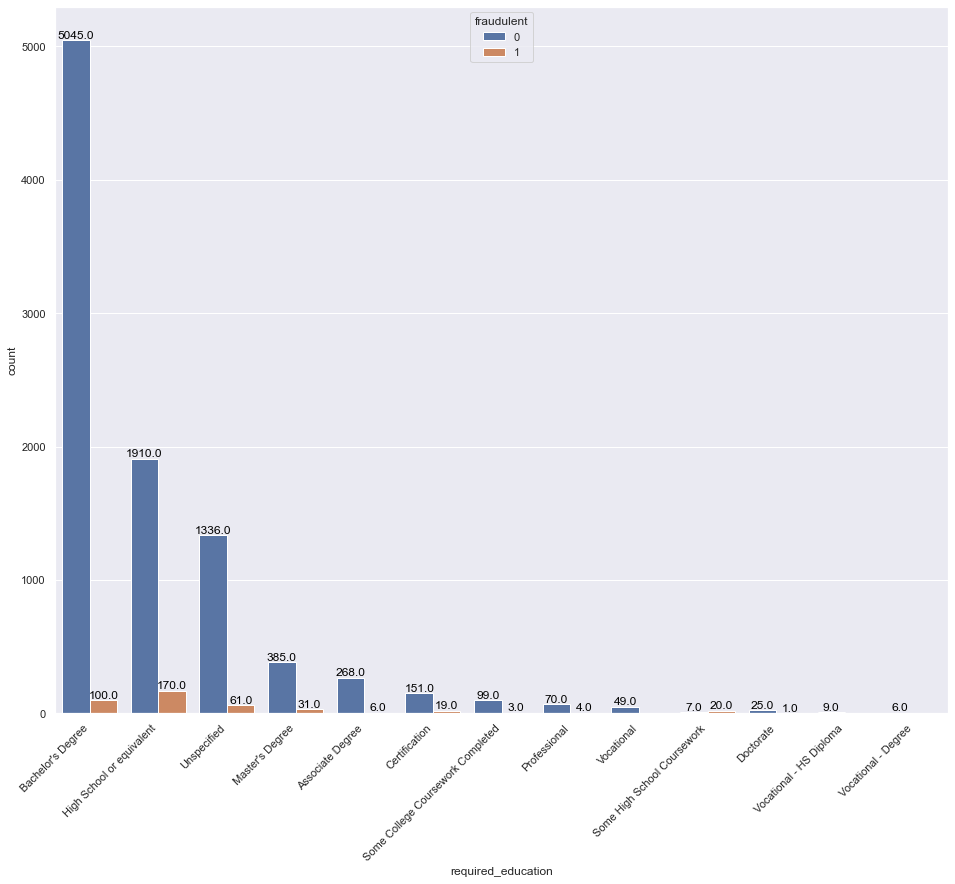

In [13]:
plt.figure(figsize=(16,13))
ax=sb.countplot(x ="required_education",hue="fraudulent", data= jobData, order=jobData['required_education'].value_counts().index)
plt.xticks(rotation = 45, ha = 'right')
for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=12)

### Most of the fraudulent job postings has High School or equivalent specified for the required education.

## Industry 

In [14]:
industry_b = pd.DataFrame(jobData['industry'])

In [15]:
#if there is a value in the variable industry replace it with 1
industry_b.loc[(industry_b.industry !='NULL'),'industry_b']='1'
#if there is an absence of value in the variable industry replace it with 0
industry_b.loc[(industry_b.industry =='NULL'),'industry_b']='0'
jobData["industry_b"] = industry_b['industry_b']
#print the num of Null and Non Null 
print(jobData["industry_b"].value_counts())

1    17880
Name: industry_b, dtype: int64


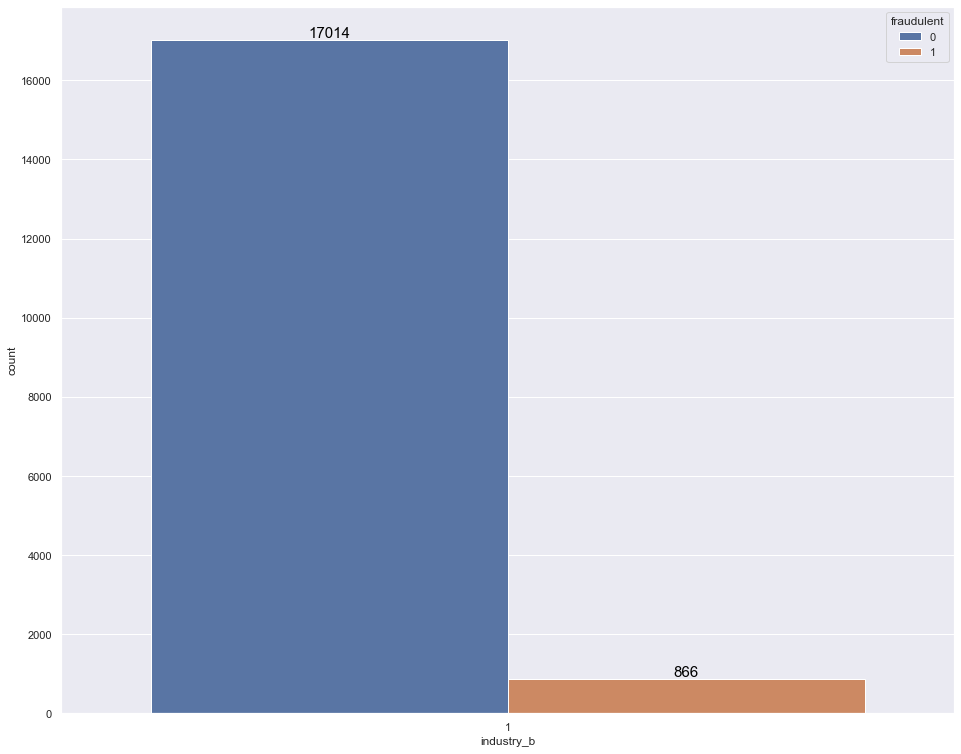

In [21]:
plt.figure(figsize=(16,13))
ax=sb.countplot(x ="industry_b",hue="fraudulent", data= jobData)
for p in ax.patches:
    
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='bottom', color='black', size=15)

### Job postings with values in the industry variable are more likely to be non-fraudulent.

## Job description length

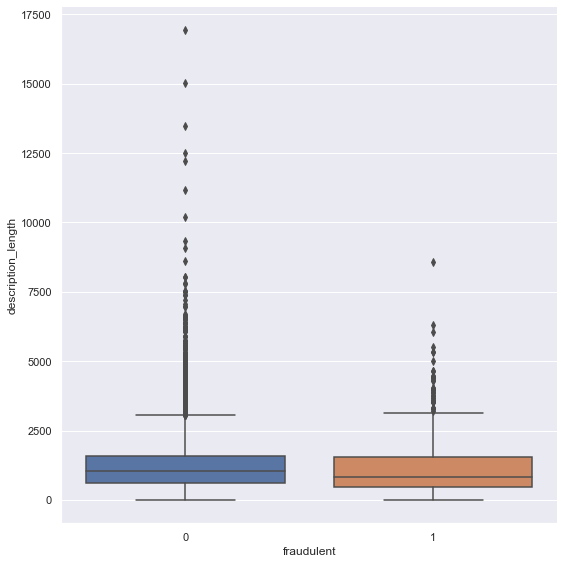

In [17]:
sb.catplot(x="fraudulent", y="description_length", kind = "box", data=jobData, height=8)

## Company profile length

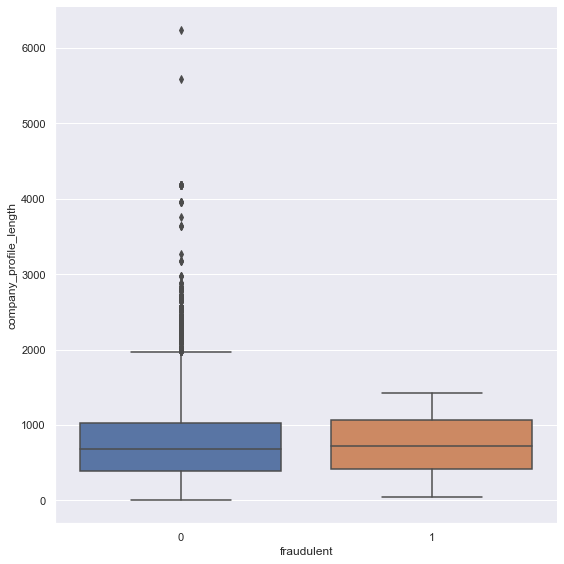

In [18]:
sb.catplot(x="fraudulent", y="company_profile_length", kind = "box", data=jobData, height=8)

## Job requirements length

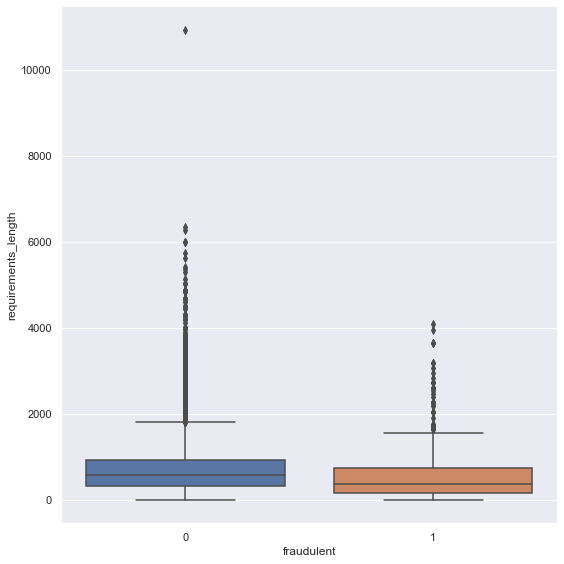

In [19]:
sb.catplot(x="fraudulent", y="requirements_length", kind="box", data=jobData, height=8)

## Benefits length

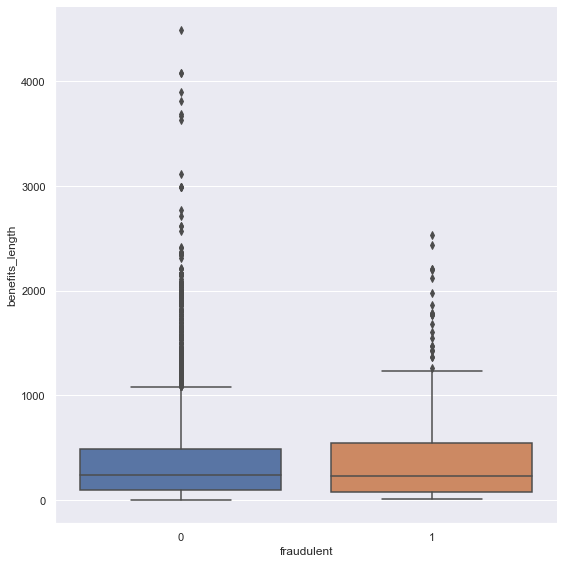

In [20]:
sb.catplot(x="fraudulent", y="benefits_length", kind="box", data=jobData, height=8)

### Variables to be used for machine learning: Title, Location, Telecommunicating, Has Company Logo, Has Questions, Employment Type, Required Experience, Required Education, Industry, Function, Fraudulent, Description Length, Company Profile Length, Requirements Length, Benefits Length. 